In [1]:
!pip install NexGCN

Looking in indexes: http://efx-nexus.systems.uk.hsbc:8083/nexus/repository/pypi.proxy/simple
  Created wheel for NexGCN: filename=NexGCN-0.1-py3-none-any.whl size=7813 sha256=f4410391a054f9a655ba859c2ba4ccd68c05267d2fd298e7a1ee07edc0953bc6
  Stored in directory: c:\users\45063883\appdata\local\pip\cache\wheels\32\e5\8c\52f197b5d04b09e7d3f0df944363988ab7b5305098bcc1ab47
Successfully built NexGCN


You should consider upgrading via the 'c:\users\45063883\appdata\local\conda\conda\envs\my_root\python.exe -m pip install --upgrade pip' command.


70


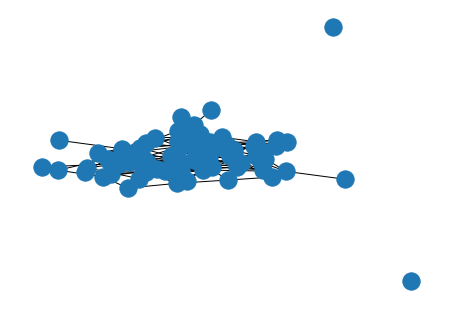

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
graph_neural_network_5 (Grap (70, 128)                 9088      
_________________________________________________________________
dropout_5 (Dropout)          (70, 128)                 0         
_________________________________________________________________
dense_5 (Dense)              (70, 2)                   258       
Total params: 9,346
Trainable params: 9,346
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
20/20 [==============================] - 0s 4ms/step - loss: 0.6529 - acc: 0.8121
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.5212 - acc: 1.0000
Epoch 3/5
20/20 [==============================] - 0s 1ms/step - loss: 0.3631 - acc: 1.0000
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 0.2178 - acc: 1.0000
Epoch 5/5
20/2

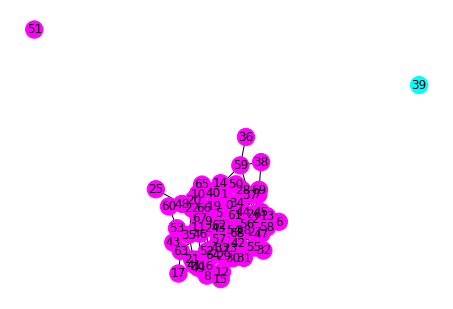

In [7]:
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten,Embedding,Dropout
from keras.models import Sequential, Model
from keras import initializers, regularizers,activations,constraints
import keras.backend as k
from tensorflow.keras.layers import Layer,Input
from keras.optimizers import Adam
import numpy as np
from networkx import to_numpy_matrix, degree_centrality, betweenness_centrality, shortest_path_length,in_degree_centrality,out_degree_centrality,eigenvector_centrality,katz_centrality,closeness_centrality
import matplotlib.pyplot as plt
import NexGCN.NexGCN as v





Gr = nx.gnm_random_graph(70,150)
print(Gr.number_of_nodes())
nx.draw(Gr)
plt.show()
exp=v.ExperimentalGCN()
kernel=v.feature_kernels()

X= kernel.feature_distributions(np.random.poisson(6,10),Gr)

exp.create_network(Gr,X,None)

predictions=exp.extract_binary_features(128,2,keras.activations.sigmoid,'adam',5,20,1)
print(predictions)
exp.draw_graph(predictions,exp.network.F.shape[-1],300,True,90,90,'#00FFFF','#FF00FF')



<class 'networkx.classes.graph.Graph'>
[[0.09090909]
 [0.09090909]
 [0.09090909]
 [0.81818182]
 [0.09090909]
 [0.09090909]
 [0.09090909]
 [0.09090909]
 [0.09090909]
 [0.09090909]
 [0.09090909]
 [0.09090909]]
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
graph_neural_network_7 (Grap (12, 128)                 1664      
_________________________________________________________________
dropout_7 (Dropout)          (12, 128)                 0         
_________________________________________________________________
dense_7 (Dense)              (12, 2)                   258       
Total params: 1,922
Trainable params: 1,922
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
20/20 [==============================] - 0s 4ms/step - loss: 0.6377 - acc: 0.8292
Epoch 2/5
20/20 [==============================] - 0s 1ms/step - loss: 0.4955 - ac

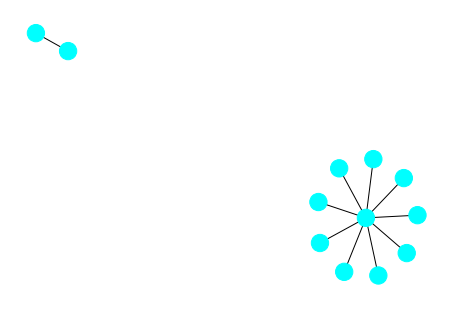

In [8]:
import pandas as pd
df=pd.read_csv("C:/Users/45063883/3D Objects/Final_Data.csv",encoding='unicode_escape')
df.head()
G=nx.from_pandas_edgelist(df[:10],source='Name',target='Type')
print(type(G))
exp=v.ExperimentalGCN()
kernel=v.feature_kernels()
X=kernel.centrality_kernel(None,G)
#X=kernel.feature_random_weight_kernel(24,G)
#X=kernel.feature_distributions(np.random.poisson(6,10),G)
print(X)
exp.create_network(G,X,None)

predictions=exp.extract_binary_features(128,2,keras.activations.sigmoid,'adam',5,20,1)
print(predictions)
exp.draw_graph(predictions,exp.network.F.shape[-1],300,False,90,90,'#00FFFF','#0F00FF')

